# Multiclass classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train dataset

In [2]:
import pandas as pd 
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Seperate X and Y

In [6]:
X = df.drop(columns=['id', 'NObeyesdad'])
Y = df[['NObeyesdad']]

In [7]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


In [8]:
Y.head()

,NObeyesdad
0,Overweight_Level_II
1,Normal_Weight
2,Insufficient_Weight
3,Obesity_Type_III
4,Overweight_Level_II


In [9]:
Y.value_counts()

NObeyesdad         
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

<Axes: xlabel='NObeyesdad'>

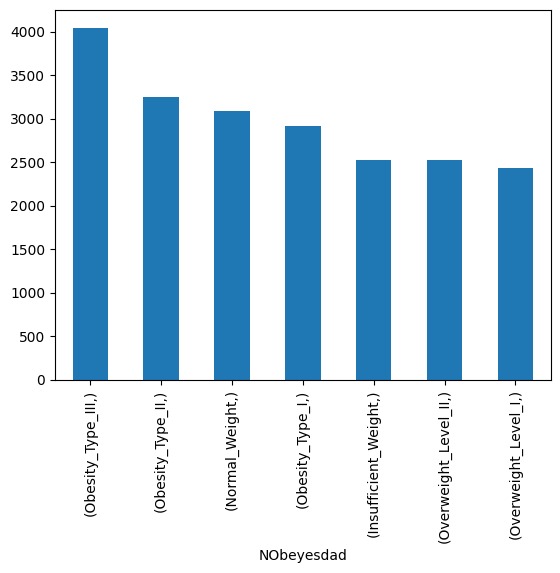

In [10]:
Y.value_counts().plot(kind='bar')

### Seperate categorical and continuous features

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [13]:
con

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

### Create a scikit learn pipeline for preprocessing

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [17]:
pre = ColumnTransformer([('con', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Apply ordinal encoder on Y data

In [19]:
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder().set_output(transform='pandas')
Y_ord = ord.fit_transform(Y)
Y_ord

,NObeyesdad
0,6.0
1,1.0
2,0.0
3,4.0
4,6.0
...,...
20753,3.0
20754,0.0
20755,3.0
20756,6.0


### Apply a train test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y_ord, test_size=0.2, random_state=42)

In [21]:
xtrain.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
9958,-1.202863,0.798937,0.345438,1.039171,0.338364,-0.048349,2.407607,0.636513,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7841,-0.206438,0.608684,-1.251408,-0.836279,1.756085,-0.048349,1.214691,0.636513,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9293,-0.352234,1.370087,1.294114,1.039171,0.169396,-0.631241,-0.288525,-1.024344,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15209,3.016595,-1.377221,-0.299019,-0.836279,0.338364,-1.691863,-1.171141,-1.024344,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16515,-0.147998,1.142541,0.269619,1.039171,0.338364,1.595165,1.214691,0.636513,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
ytrain.head()

,NObeyesdad
9958,2.0
7841,0.0
9293,3.0
15209,2.0
16515,6.0


In [23]:
xtest.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
10317,0.379434,-0.584893,0.911536,1.039171,0.338364,-1.211170,-1.093287,0.157075,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4074,-1.027052,0.569868,-0.299019,-0.836279,0.338364,-0.048349,0.021775,0.636513,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9060,-0.084652,0.150442,-0.120003,0.814419,0.338364,1.344141,1.214691,-1.020025,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11286,1.083034,-0.338770,0.914090,-1.638904,0.338364,-0.042493,-1.171141,-0.834247,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8254,-1.202863,-1.033617,-1.436296,-0.836279,0.338364,-0.048349,-1.171141,2.297369,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
ytest.head()

,NObeyesdad
10317,4.0
4074,5.0
9060,2.0
11286,3.0
8254,0.0


In [25]:
xtrain.shape

(16606, 30)

In [26]:
xtest.shape

(4152, 30)

In [27]:
ytrain.value_counts()

NObeyesdad
4.0           3242
3.0           2591
1.0           2456
2.0           2367
6.0           2008
0.0           1999
5.0           1943
Name: count, dtype: int64

In [28]:
ytest.value_counts()

NObeyesdad
4.0           804
3.0           657
1.0           626
2.0           543
0.0           524
6.0           514
5.0           484
Name: count, dtype: int64

### Convert target feature to categorical

In [29]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [30]:
ytrain_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [31]:
ytrain_cat[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:
ytest_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### Create a neural network

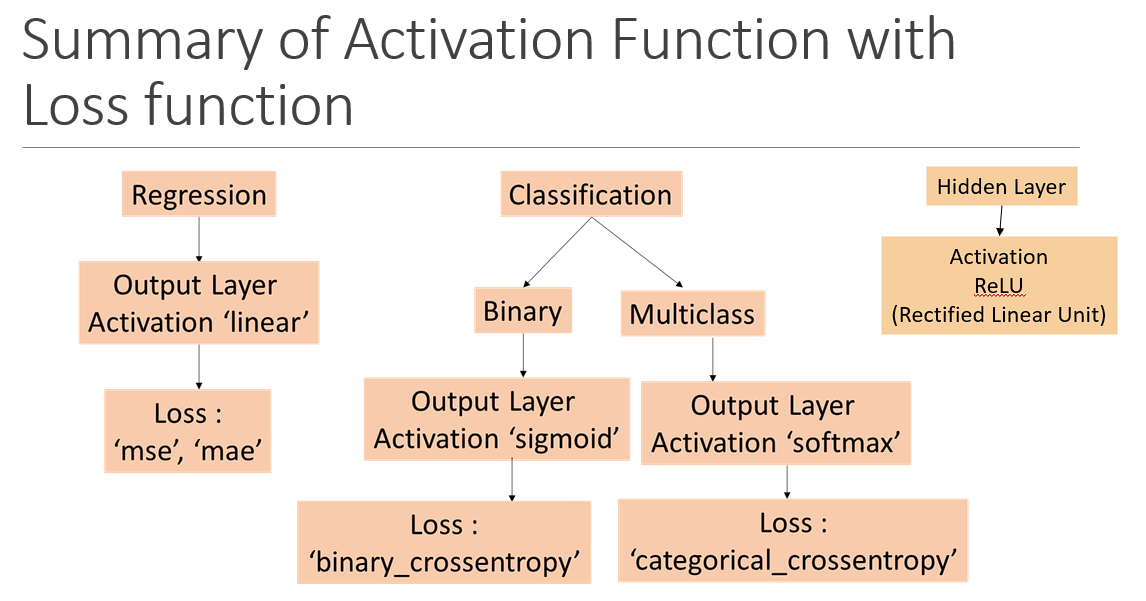

In [34]:
xtrain.shape

(16606, 30)

In [35]:
xtrain.shape[1]

30

In [37]:
ytrain_cat.shape

(16606, 7)

In [38]:
ytrain_cat.shape[1]

7

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [39]:
# Create a model
model = Sequential()

# Add a hidden layer 1
model.add(Dense(64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dropout(0.4))
# Add hidden layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
# Output layer
model.add(Dense(7, activation='softmax'))

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
earlystop = EarlyStopping(monitor='val_loss', patience=10)

### Fit the model

In [42]:
hist = model.fit(xtrain, ytrain_cat, 
                 validation_split=0.2, 
                 epochs=400, 
                 callbacks=[earlystop])

Epoch 1/400


416/416 [==============================] - 3s 3ms/step - loss: 1.2231 - accuracy: 0.5171 - val_loss: 0.7234 - val_accuracy: 0.7267
Epoch 2/400
416/416 [==============================] - 1s 3ms/step - loss: 0.8050 - accuracy: 0.6650 - val_loss: 0.5698 - val_accuracy: 0.7992
Epoch 3/400
416/416 [==============================] - 1s 3ms/step - loss: 0.6785 - accuracy: 0.7249 - val_loss: 0.4821 - val_accuracy: 0.8432
Epoch 4/400
416/416 [==============================] - 1s 3ms/step - loss: 0.6126 - accuracy: 0.7576 - val_loss: 0.4623 - val_accuracy: 0.8384
Epoch 5/400
416/416 [==============================] - 1s 3ms/step - loss: 0.5879 - accuracy: 0.7722 - val_loss: 0.4320 - val_accuracy: 0.8543
Epoch 6/400
416/416 [==============================] - 1s 2ms/step - loss: 0.5635 - accuracy: 0.7808 - val_loss: 0.4145 - val_accuracy: 0.8579
Epoch 7/400
416/416 [==============================] - 1s 2ms/step - loss: 0.5479 - accuracy: 0.7977 - val_loss: 0.4138 - val_accuracy: 0.85

### Evaluate model in train and test

In [44]:
model.evaluate(xtrain, ytrain_cat)

519/519 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8867


[0.32466477155685425, 0.8866674900054932]

In [46]:
model.evaluate(xtest, ytest_cat)

 34/130 [======>.......................] - ETA: 0s - loss: 0.3615 - accuracy: 0.8686

130/130 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8757


[0.3618781864643097, 0.8757225275039673]

### Plot the learning curve

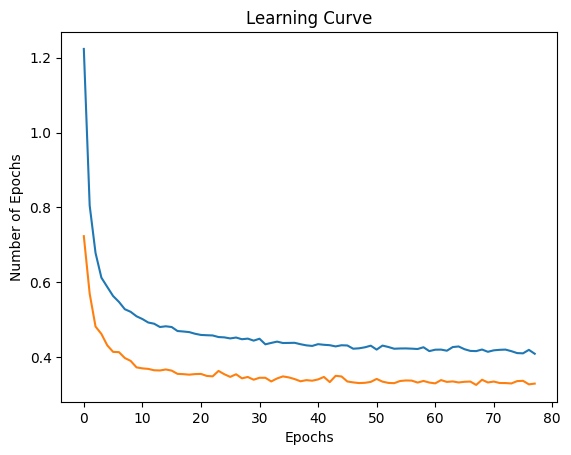

In [47]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Number of Epochs')
plt.title('Learning Curve')
plt.show()

### Predict the probability for train and test

In [48]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

130/130 [==============================] - 0s 2ms/step


In [49]:
yprob_tr[0:5]

array([[4.8485026e-06, 5.2224984e-09, 9.5345122e-01, 2.8378762e-02,
        3.4915942e-05, 2.1887702e-04, 1.7911352e-02],
       [8.3102369e-01, 1.6847852e-01, 1.2648081e-11, 2.3176740e-16,
        1.7830924e-05, 4.7995697e-04, 1.4621697e-10],
       [4.8772767e-11, 7.7750476e-28, 1.0313132e-03, 9.9887890e-01,
        8.9786990e-05, 1.2716586e-15, 9.4358601e-09],
       [1.7048427e-05, 5.4831798e-06, 8.9936852e-01, 5.3077652e-03,
        1.4087594e-05, 2.1335738e-02, 7.3951438e-02],
       [1.1058003e-06, 4.4757002e-05, 6.8619281e-02, 6.5193204e-03,
        1.0838713e-06, 5.4287069e-02, 8.7052739e-01]], dtype=float32)

In [51]:
yprob_ts[0:5]

array([[5.4559605e-16, 1.1436480e-25, 4.9070142e-05, 1.0046736e-10,
        9.9995089e-01, 3.3882649e-16, 5.1536132e-12],
       [2.3013531e-04, 7.7414729e-02, 4.0523680e-03, 9.7379252e-06,
        4.0006820e-05, 8.3428395e-01, 8.3969153e-02],
       [8.1665094e-05, 1.0363147e-04, 6.8159860e-01, 6.2921881e-03,
        4.4803933e-04, 5.0916683e-02, 2.6055914e-01],
       [6.5872711e-12, 3.8950342e-24, 1.4052085e-02, 9.8594725e-01,
        9.1043564e-09, 8.7594146e-13, 6.7443307e-07],
       [7.3934233e-01, 2.5642896e-01, 2.6176411e-10, 1.1754469e-14,
        1.5582485e-04, 4.0728813e-03, 2.2213065e-08]], dtype=float32)

### Get the prediction

In [52]:
import numpy as np
ypred_tr = np.argmax(yprob_tr, axis=1)
ypred_ts = np.argmax(yprob_ts, axis=1)

In [53]:
ypred_tr[0:5]

array([2, 0, 3, 2, 6], dtype=int64)

In [54]:
ytrain.head()

,NObeyesdad
9958,2.0
7841,0.0
9293,3.0
15209,2.0
16515,6.0


In [55]:
ypred_ts[0:5]

array([4, 5, 2, 3, 0], dtype=int64)

In [56]:
ytest.head()

,NObeyesdad
10317,4.0
4074,5.0
9060,2.0
11286,3.0
8254,0.0


### Getting orignal labels

In [58]:
ytrain_org = ord.inverse_transform(ytrain)
ytest_org = ord.inverse_transform(ytest)

In [59]:
ytrain_org[0:5]

array([['Obesity_Type_I'],
       ['Insufficient_Weight'],
       ['Obesity_Type_II'],
       ['Obesity_Type_I'],
       ['Overweight_Level_II']], dtype=object)

In [64]:
ytrain_org.shape

(16606, 1)

In [60]:
ytest_org[0:5]

array([['Obesity_Type_III'],
       ['Overweight_Level_I'],
       ['Obesity_Type_I'],
       ['Obesity_Type_II'],
       ['Insufficient_Weight']], dtype=object)

In [68]:
ypred_tr_lb = ord.inverse_transform(pd.DataFrame([ypred_tr]).T)
ypred_ts_lb = ord.inverse_transform(pd.DataFrame([ypred_ts]).T)

In [69]:
ypred_ts_lb[0:5]

array([['Obesity_Type_III'],
       ['Overweight_Level_I'],
       ['Obesity_Type_I'],
       ['Obesity_Type_II'],
       ['Insufficient_Weight']], dtype=object)

In [71]:
ypred_ts_lb[0:5]

array([['Obesity_Type_III'],
       ['Overweight_Level_I'],
       ['Obesity_Type_I'],
       ['Obesity_Type_II'],
       ['Insufficient_Weight']], dtype=object)

### Plot the confusion matrix

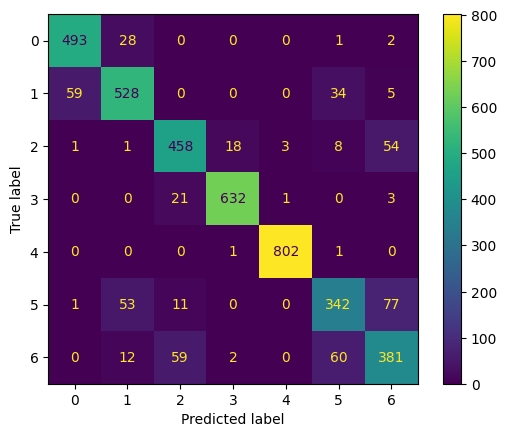

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest_org, ypred_ts_lb)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [73]:
from sklearn.metrics import classification_report 
print(classification_report(ytest_org, ypred_ts_lb))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.94      0.91       524
      Normal_Weight       0.85      0.84      0.85       626
     Obesity_Type_I       0.83      0.84      0.84       543
    Obesity_Type_II       0.97      0.96      0.96       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.77      0.71      0.74       484
Overweight_Level_II       0.73      0.74      0.74       514

           accuracy                           0.88      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.88      0.88      4152



### Perform predictions for out of sample data

In [74]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [75]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,0.537644,1.695675,1.241770,0.924049,0.338364,1.308584,-0.150721,-1.024344,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.499620,-1.148152,-0.829748,-0.836279,-2.497077,1.595165,0.021775,-1.024344,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.379434,-0.651587,0.898933,1.039171,0.338364,0.973714,-1.171141,-0.608296,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.503267,-1.685011,0.598259,-0.836279,0.307045,1.244138,-1.057992,-1.024344,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.379434,-0.834373,0.642469,1.039171,0.338364,1.025738,-1.171141,0.206466,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Predict the probability

In [76]:
probs = model.predict(xnew_pre)
probs

433/433 [==============================] - 1s 1ms/step


array([[2.1081281e-10, 9.1660899e-27, 1.0211699e-03, ..., 4.4737939e-05,
        2.3717731e-15, 1.2433995e-08],
       [1.3187382e-04, 1.1027697e-02, 1.1763145e-02, ..., 3.4505170e-05,
        9.5974213e-01, 1.7296903e-02],
       [4.0003905e-16, 1.1309073e-26, 5.5397086e-05, ..., 9.9994457e-01,
        9.8650903e-17, 1.6082165e-12],
       ...,
       [9.2556190e-01, 7.3009312e-02, 4.1984589e-11, ..., 1.1231745e-05,
        1.4174952e-03, 1.3731812e-10],
       [1.1220149e-01, 8.8138545e-01, 1.1871017e-08, ..., 2.3827391e-05,
        6.3886233e-03, 5.9875896e-07],
       [1.2944255e-10, 3.3745997e-26, 2.0430461e-03, ..., 1.0753833e-05,
        1.6003697e-14, 4.7819018e-08]], dtype=float32)

In [77]:
preds = np.argmax(probs, axis=1)
preds

array([3, 5, 4, ..., 0, 1, 3], dtype=int64)

In [78]:
preds_lb = ord.inverse_transform(pd.DataFrame([preds]).T)
preds_lb

array([['Obesity_Type_II'],
       ['Overweight_Level_I'],
       ['Obesity_Type_III'],
       ...,
       ['Insufficient_Weight'],
       ['Normal_Weight'],
       ['Obesity_Type_II']], dtype=object)

In [79]:
max_prob = np.max(probs, axis=1)
max_prob

array([0.9989341 , 0.9597421 , 0.99994457, ..., 0.9255619 , 0.88138545,
       0.9979462 ], dtype=float32)

### Save above results in Dataframe

In [80]:
df_final = xnew[['id']]
df_final.head()

,id
0,20758
1,20759
2,20760
3,20761
4,20762


In [82]:
df_final['Obesity_pred'] = preds_lb.flatten()
df_final['Prob'] = max_prob

In [83]:
df_final.head()

,id,Obesity_pred,Prob
0,20758,Obesity_Type_II,0.998934
1,20759,Overweight_Level_I,0.959742
2,20760,Obesity_Type_III,0.999945
3,20761,Obesity_Type_I,0.927675
4,20762,Obesity_Type_III,0.999615


In [84]:
df_final['Obesity_pred'].value_counts()

Obesity_pred
Obesity_Type_III       2633
Obesity_Type_II        2106
Normal_Weight          2101
Obesity_Type_I         2066
Overweight_Level_II    1817
Insufficient_Weight    1810
Overweight_Level_I     1307
Name: count, dtype: int64

<Axes: xlabel='Obesity_pred'>

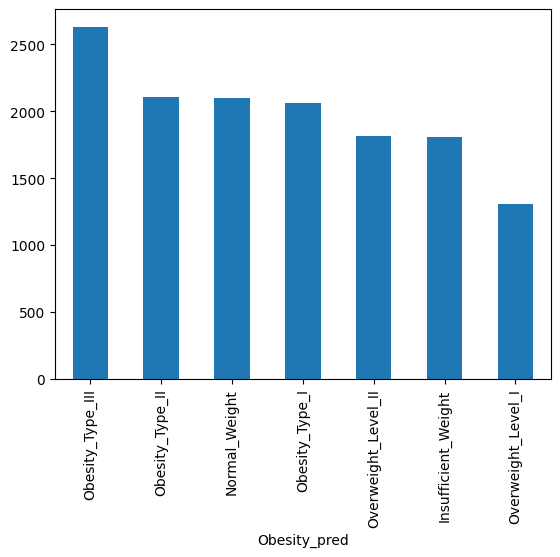

In [85]:
df_final['Obesity_pred'].value_counts().plot(kind='bar')

### Save above file in results.csv

In [86]:
df_final.to_csv('Results.csv', index=False)